### Background Project

In this “getting started” competition, you’ll use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer

**Evaluation**

The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

The RMSLE is calculated as:
[\sqrt{ \frac{1}{n} \sum_{i=1}^n \left(\log (1 + \hat{y}_i) - \log (1 + y_i)\right)^2}]
where:

𝑛
 is the total number of instances,
𝑦̂ 𝑖
 is the predicted value of the target for instance (i),
𝑦𝑖
 is the actual value of the target for instance (i), and,
log
 is the natural logarithm.

### Import Libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os


In [34]:
from datetime import datetime as dt

In [4]:
seed = 42

sns.set_style('darkgrid')
sns.set_palette('Set2')


### Load datset

#### Read the data

In [5]:
train = pd.read_csv("dataset/train.csv")

In [6]:
dataset = ["train", "test", "oil", "holidays_events", "stores", "transactions"]

In [7]:
for data in dataset:
    print(data)
    exec("{} = pd.read_csv('dataset/{}.csv')".format(data, data))

train
test
oil
holidays_events
stores
transactions


#### explore data

#### train data

In [8]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


#### transactioin data

In [10]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


#### stores data

In [12]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [13]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


#### oil data

In [14]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [15]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


#####  holidays_events data

In [18]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [19]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


### EDA

#### Cleaning The data

In [78]:
def index_date(data):
    data["date"] = pd.to_datetime(data["date"])
    return data.set_index("date", inplace=True)


In [29]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [31]:
train.duplicated().sum()

0

In [35]:
train["date"] = pd.to_datetime(train["date"])

In [36]:
train.set_index('date', inplace=True)

In [58]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [79]:
index_date(test)

In [83]:
index_date(transactions)

#### Analysis by sales data

In [59]:
dataset

['train', 'test', 'oil', 'holidays_events', 'stores', 'transactions']

In [62]:
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [64]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [63]:
satu = train.loc["2013-01-02", :]

In [70]:
satu.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-02,1782,1,AUTOMOTIVE,2.0,0
2013-01-02,1783,1,BABY CARE,0.0,0
2013-01-02,1784,1,BEAUTY,2.0,0
2013-01-02,1785,1,BEVERAGES,1091.0,0
2013-01-02,1786,1,BOOKS,0.0,0


In [68]:
satu[satu["store_nbr"] == 1].shape

(33, 5)

In [55]:
satu.shape

(1782, 5)

In [102]:
satu.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-02,1782,1,AUTOMOTIVE,2.0,0
2013-01-02,1783,1,BABY CARE,0.0,0
2013-01-02,1784,1,BEAUTY,2.0,0
2013-01-02,1785,1,BEVERAGES,1091.0,0
2013-01-02,1786,1,BOOKS,0.0,0


In [106]:
transactions.loc["2013-01-02", :].head()

,store_nbr,transactions
date,,
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922
2013-01-02,5,1903


In [73]:
satu[satu["store_nbr"] == 25].sum()

id                                                         77847
store_nbr                                                    825
family         AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...
sales                                                   5316.224
onpromotion                                                    0
dtype: object

In [23]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [96]:
transactions.loc["2013-01-02", :].head()

,store_nbr,transactions
date,,
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922
2013-01-02,5,1903


In [27]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [42]:
train.groupby([train.index.get_level_values(0), "store_nbr"])["sales"].sum()[]


date        store_nbr
2013-01-01  1                0.000000
            2                0.000000
            3                0.000000
            4                0.000000
            5                0.000000
                             ...     
2017-08-15  50           16879.121004
            51           20154.559000
            52           18600.046000
            53            8208.189000
            54           12666.858000
Name: sales, Length: 90936, dtype: float64

#### Analysis sale by store

In [113]:
train.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
           dtype='int64', name='date', length=3000888)

In [114]:
transactions.index.min(), transactions.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [118]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [137]:
stores.shape

(54, 5)

In [134]:
print(f'there are {stores["cluster"].nunique()} clusters')

there are 17 clusters


In [139]:
stores["type"].value_counts().sort_index()

A     9
B     8
C    15
D    18
E     4
Name: type, dtype: int64

In [155]:
stores["city"].value_counts().sort_index()

Ambato            2
Babahoyo          1
Cayambe           1
Cuenca            3
Daule             1
El Carmen         1
Esmeraldas        1
Guaranda          1
Guayaquil         8
Ibarra            1
Latacunga         2
Libertad          1
Loja              1
Machala           2
Manta             2
Playas            1
Puyo              1
Quevedo           1
Quito            18
Riobamba          1
Salinas           1
Santo Domingo     3
Name: city, dtype: int64

<AxesSubplot: >

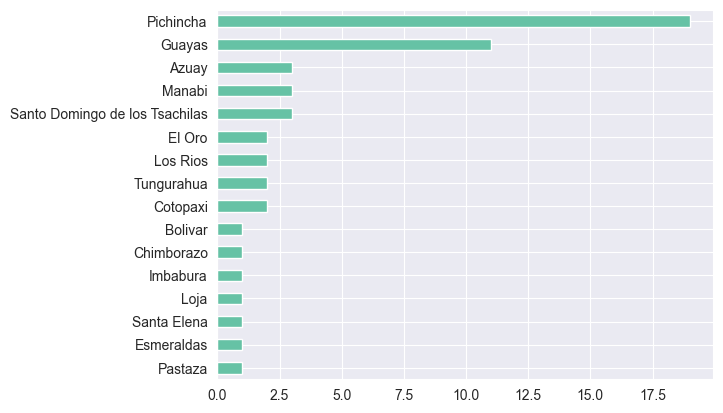

In [151]:
stores["state"].value_counts().sort_values().plot(kind='barh')

### maybe you can add anotate to the bar

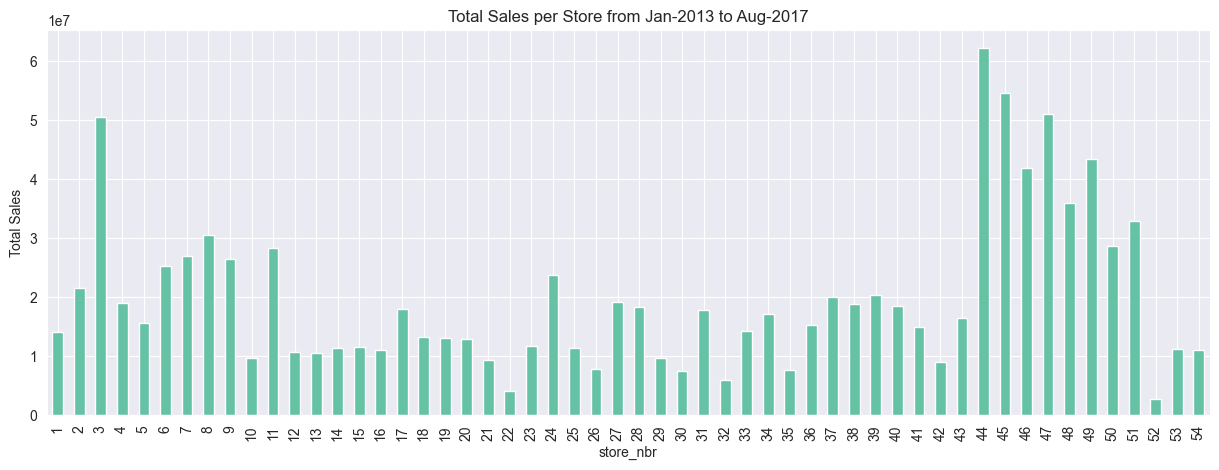

In [123]:
train.groupby("store_nbr")["sales"].sum().plot(kind="bar", figsize=(15, 5))

plt.title("Total Sales per Store from Jan-2013 to Aug-2017")
plt.xtitle("Store Number")
plt.show()


In [166]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [171]:
train_sales = train.groupby("store_nbr")["sales"].sum()

In [190]:
stores_merge = stores.merge(train_sales, left_on="store_nbr", right_index=True)

In [191]:
stores_merge[stores_merge["sales"] > 3*10**7]

,store_nbr,city,state,type,cluster,sales
2,3,Quito,Pichincha,D,8,5.048191e+07
7,8,Quito,Pichincha,D,8,3.049429e+07
43,44,Quito,Pichincha,A,5,6.208755e+07
44,45,Quito,Pichincha,A,11,5.449801e+07
45,46,Quito,Pichincha,A,14,4.189606e+07
46,47,Quito,Pichincha,A,14,5.094831e+07
47,48,Quito,Pichincha,A,14,3.593313e+07
48,49,Quito,Pichincha,A,11,4.342010e+07
50,51,Guayaquil,Guayas,A,17,3.291149e+07


just for note if we dont have transactions data for testind date range. this is can make as confident to dont use the transactions data

<AxesSubplot: xlabel='store_nbr'>

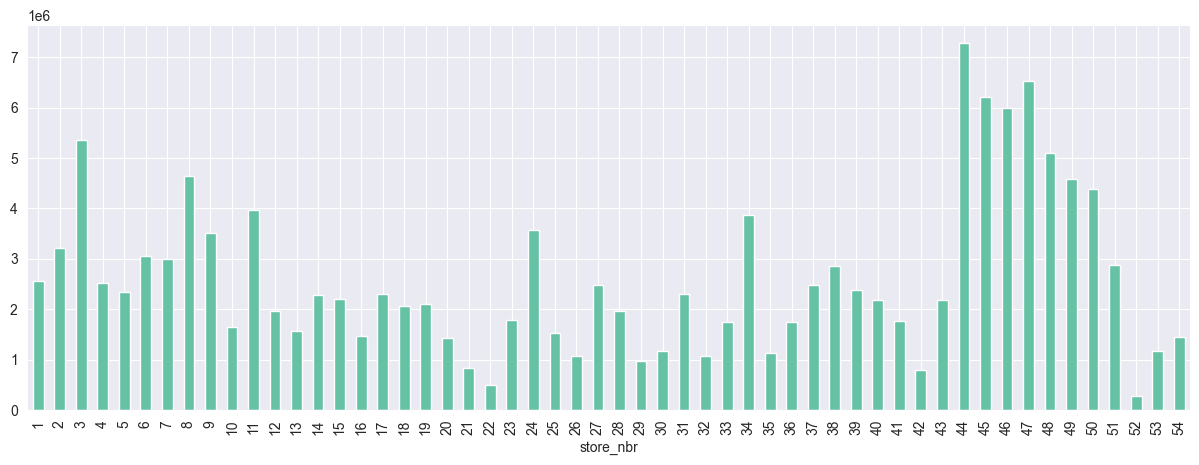

In [179]:
transactions.groupby("store_nbr")["transactions"].sum().plot(kind="bar", figsize=(15, 5))

In [ ]:
stores["city"].value_counts().sort_index()

Ambato            2
Babahoyo          1
Cayambe           1
Cuenca            3
Daule             1
El Carmen         1
Esmeraldas        1
Guaranda          1
Guayaquil         8
Ibarra            1
Latacunga         2
Libertad          1
Loja              1
Machala           2
Manta             2
Playas            1
Puyo              1
Quevedo           1
Quito            18
Riobamba          1
Salinas           1
Santo Domingo     3
Name: city, dtype: int64

#### Do analysis by Famiiy

<AxesSubplot: ylabel='family'>

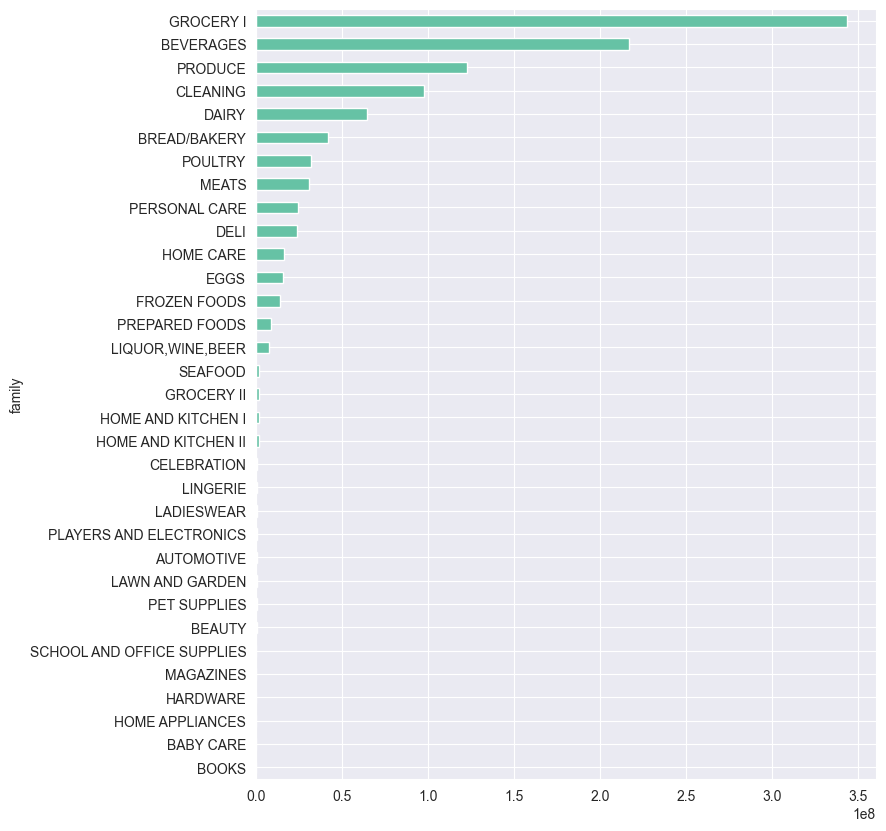

In [199]:
train.groupby("family")["sales"].sum().sort_values().plot(kind="barh", figsize=(8, 10))

#### Do analysis by Time Series

##### Year Sales

In [246]:
train["year"] = train.index.year
train["month"] = train.index.month
train["weekday"] = train.index.weekday
train["day"] = train.index.day
train["quarter"] = train.index.quarter

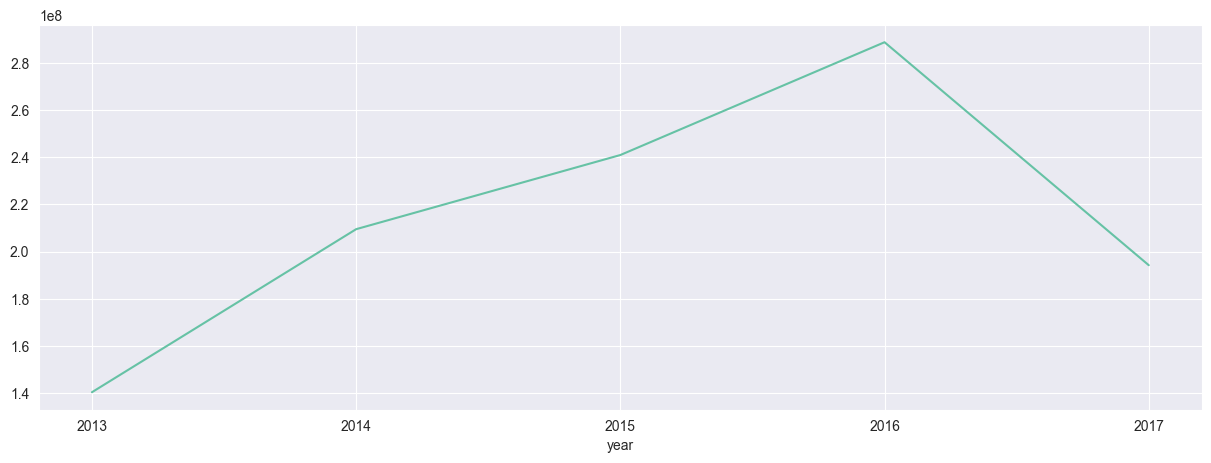

In [251]:
train.groupby("year")["sales"].sum().plot(kind="line", figsize=(15, 5))
plt.xticks(np.arange(2013, 2018, 1))

plt.show()

In [252]:
if we see in 2017 number of sales is decrease because one of the reason is we only have data until august 2017. 

SyntaxError: invalid syntax (3496055513.py, line 1)

In [253]:
### make data fram quarter

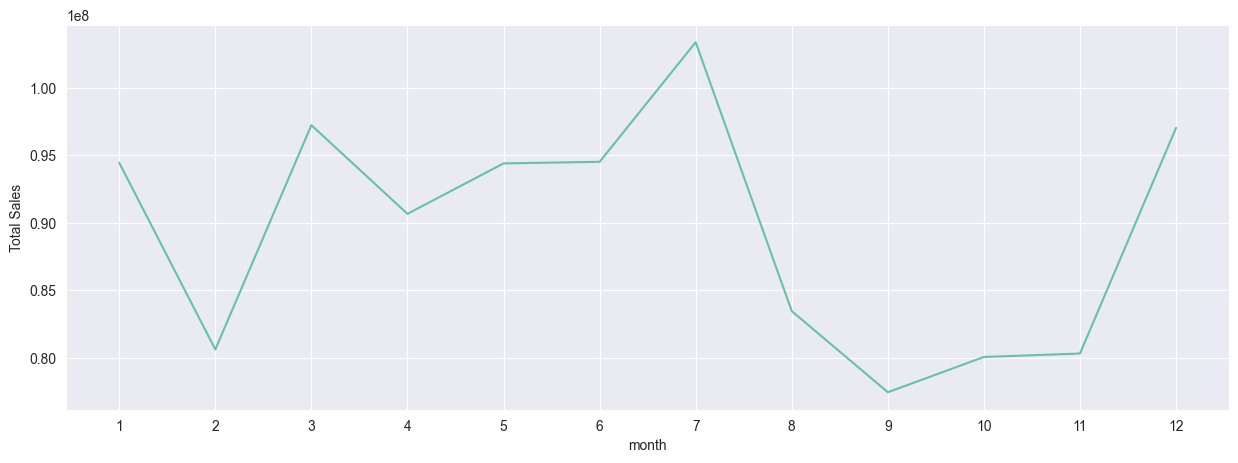

In [238]:
train.groupby("month")["sales"].sum().plot(kind="line", figsize=(15, 5))
plt.xticks(np.arange(1, 13))
plt.ylabel("Total Sales")
plt.show()